In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [7]:
data = {
    'area':[2600,3000,3200,3600,4000],
    'price':[550000,565000,610000,680000,725000]
}
df = pd.DataFrame(data)


In [9]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


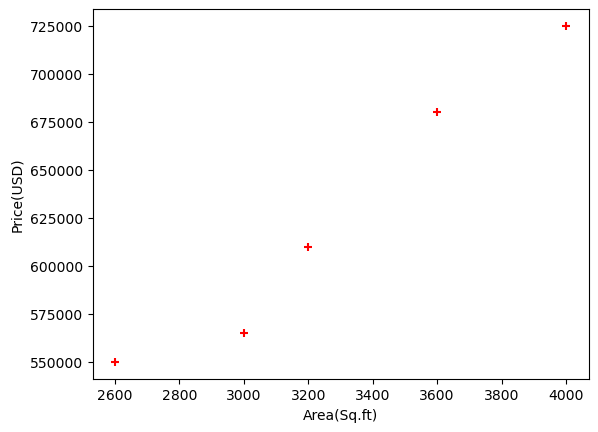

In [96]:
%matplotlib inline
plt.xlabel('Area(Sq.ft)')
plt.ylabel('Price(USD)')
plt.scatter(df.area,df.price, color='red',marker='+')



## **Linear Regression Model**
- creates a linear regression model object
- model assumes a linear relationship between the independent variables (features) and the dependent variable (target).
- area column as the independent variable (feature). It's passed as a DataFrame (double square brackets are used for a DataFrame).
-  price column as the dependent variable (target). It's passed as a Series.
-  fit method calculates the coefficients (slope) and the intercept of the best-fit line for the given data.
-  model learns equation price=(coefficient)×area+intercept


In [37]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

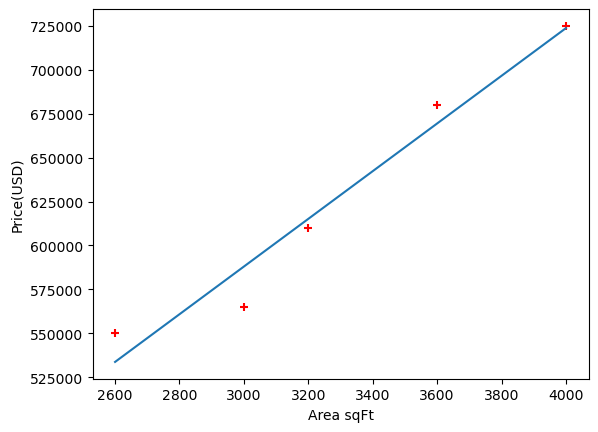

In [104]:
#scatter plotting the linear regression line
plt.xlabel('Area sqFt')
plt.ylabel('Price(USD)')
plt.scatter(df.area,df.price,marker='+',color='red')
plt.plot(df.area,reg.predict(df[['area']]))#returns price from the predict function

In [45]:
predicted_price = reg.predict([[5000]]) #
print("Predicted Price for 5000 sqft is ",predicted_price[0])

Predicted Price for 5000 sqft is  859554.7945205481


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Accesing cofeccients and intercept


In [48]:
# Print slope (coefficient) and intercept
print("Slope (Coefficient):", reg.coef_[0])  # Coefficients are in an array
print("Intercept:", reg.intercept_)

Slope (Coefficient): 135.78767123287673
Intercept: 180616.43835616432


### Predicting a Series Prices
- based on the linear regression model we made earlier
- reg = linear_model.LinearRegression()
- reg.fit(df[['area']],df.price)

In [81]:
area = {
    'area': [1000,1500,2300,3540,4120,4560,5490,3460,4750,2300,2600,3000,3200,3600,4000]
}
area_df = pd.DataFrame(area)
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [85]:
price_predict = reg.predict(area_df[['area']]) # expects one column to predict as it is train that way
#adding new column to display predicted price
area_df['Predicted_Prices'] = price_predict
area_df

,area,Predicted_Prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836
5,4560,799808.219178
6,5490,926090.753425
7,3460,650441.780822
8,4750,825607.876712
9,2300,492928.082192


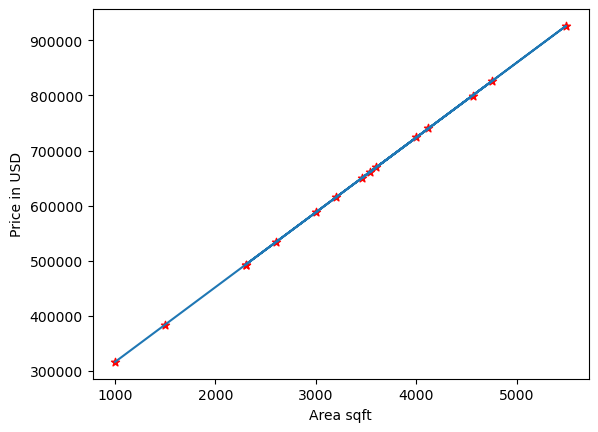

In [112]:
plt.xlabel('Area sqft')
plt.ylabel('Price in USD')
plt.scatter(area_df.area,area_df.Predicted_Prices,color='red',marker='*')
plt.plot(area_df.area,area_df.Predicted_Prices)

In [92]:
#Exporting into csvs file
area_df.to_csv("AreaPricePrediction.csv",index=False)

## Conclusion
- here we can see it cannot predict exactly but near to it or give the prediction
- we have given the same input variable some has close prediction and some has far value
- It is perfect if the change is exact and same